In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (11, 6)


In [ ]:
file_paths = [
    'Data/Combined_CSV/api_data_aadhar_biometric_combined.csv',
    'Data/Combined_CSV/api_data_aadhar_demographic_combined.csv',
    'Data/Combined_CSV/api_data_aadhar_enrolment_combined.csv'
]

df_biometric = pd.read_csv(file_paths[0])
df_demographic = pd.read_csv(file_paths[1])
df_enrolment = pd.read_csv(file_paths[2])


In [ ]:
dataframes = {
    "Biometric": df_biometric,
    "Demographic": df_demographic,
    "Enrolment": df_enrolment
}


In [ ]:
for name, df in dataframes.items():
    print(f"\n{name} Shape:", df.shape)
    print("Missing values (%):")
    print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head())



Biometric Shape: (1861108, 6)
Missing values (%):
date            0.0
state           0.0
district        0.0
pincode         0.0
bio_age_5_17    0.0
dtype: float64

Demographic Shape: (2071700, 6)
Missing values (%):
date             0.0
state            0.0
district         0.0
pincode          0.0
demo_age_5_17    0.0
dtype: float64

Enrolment Shape: (1006029, 7)
Missing values (%):
date        0.0
state       0.0
district    0.0
pincode     0.0
age_0_5     0.0
dtype: float64


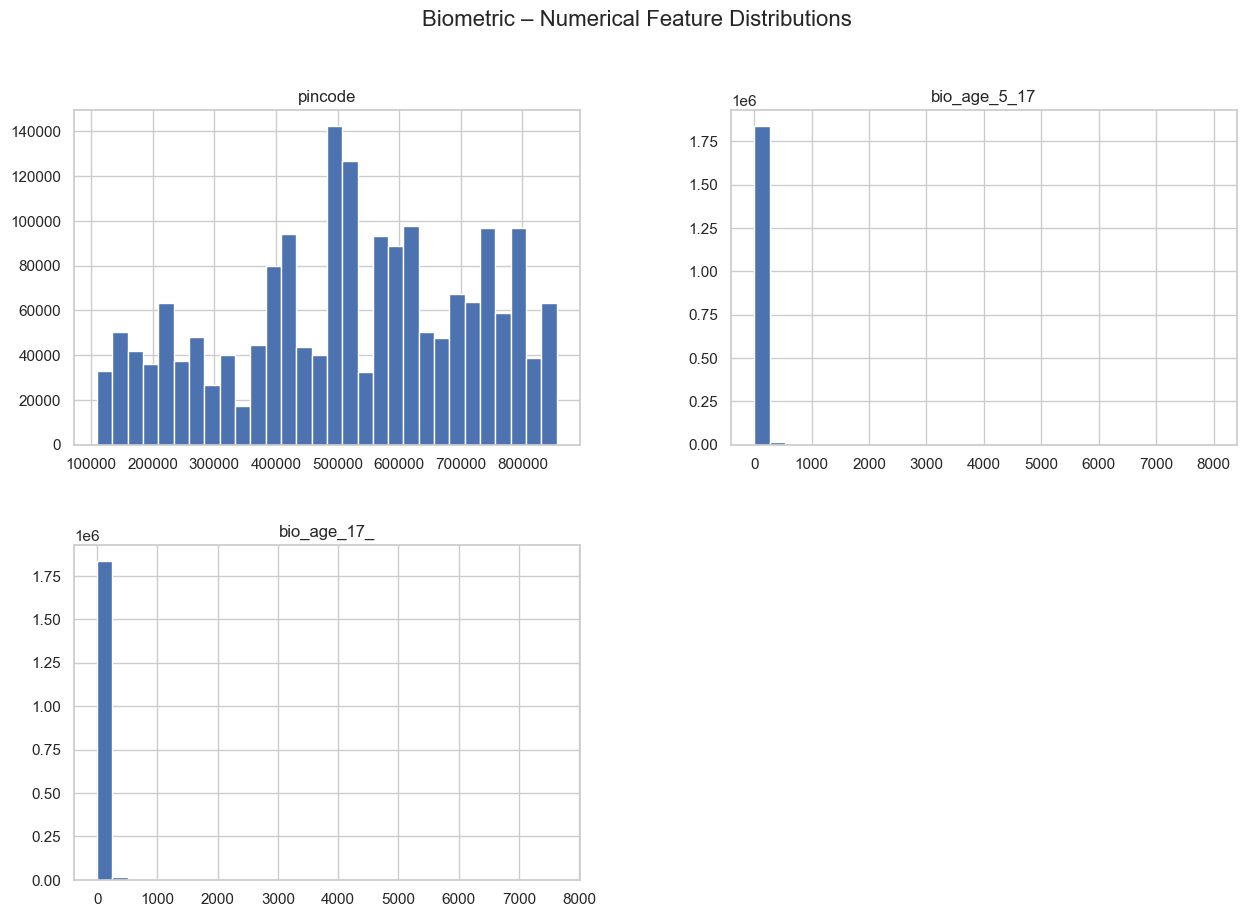

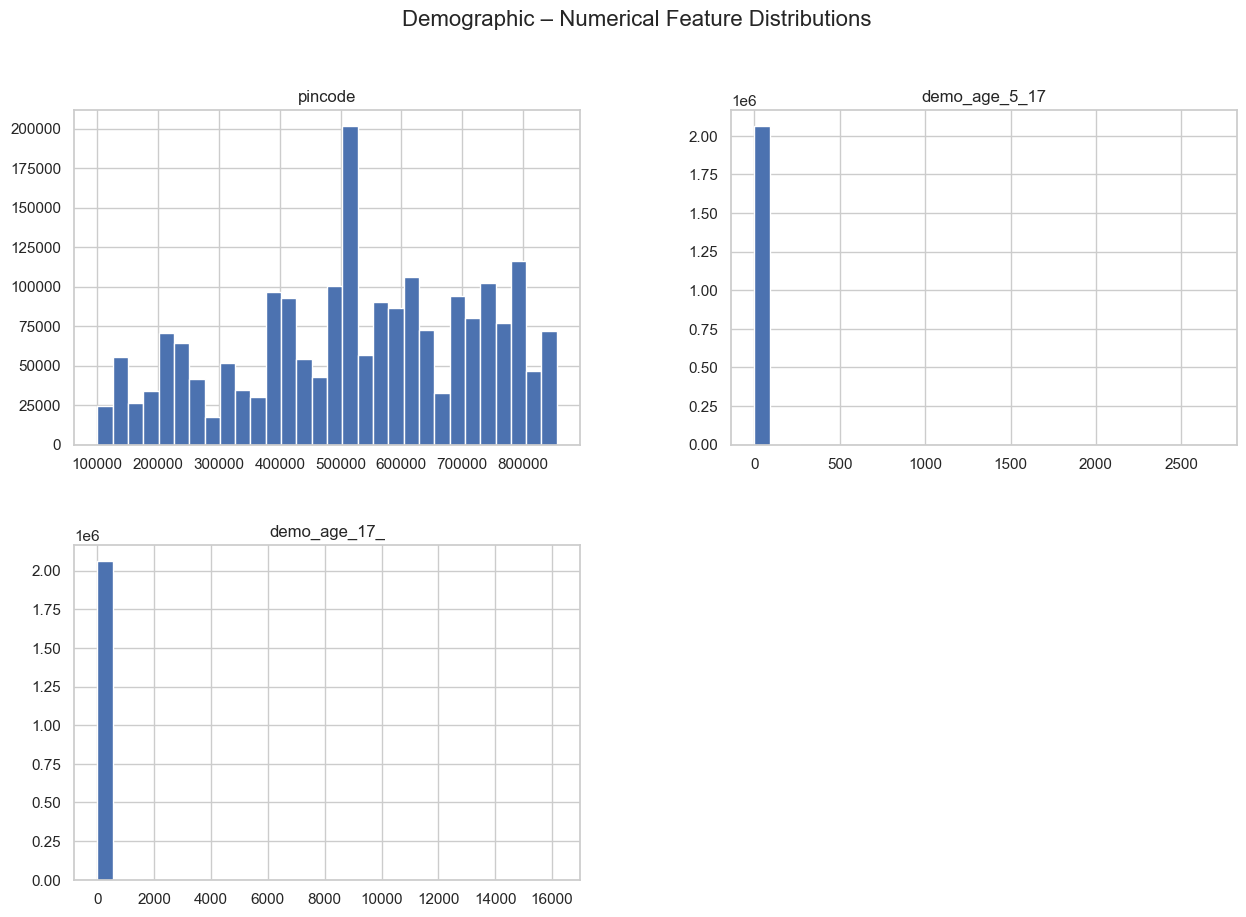

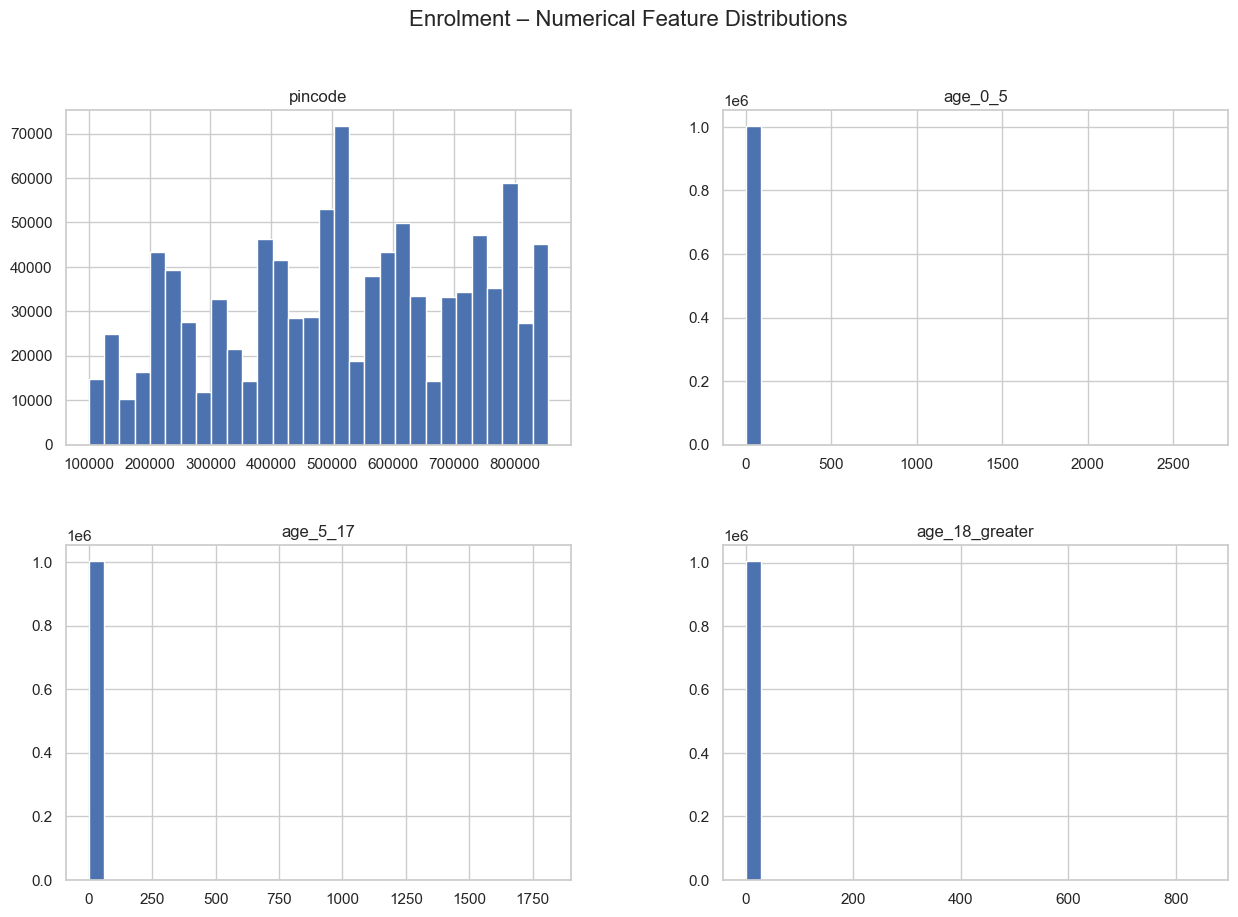

In [ ]:
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    if len(numeric_cols) == 0:
        continue

    df[numeric_cols].hist(bins=30, figsize=(15, 10))
    plt.suptitle(f"{name} – Numerical Feature Distributions", fontsize=16)
    plt.show()


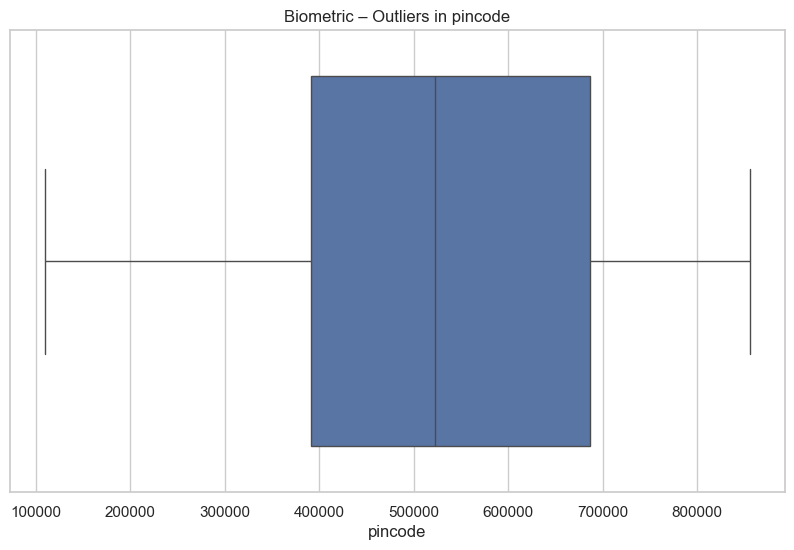

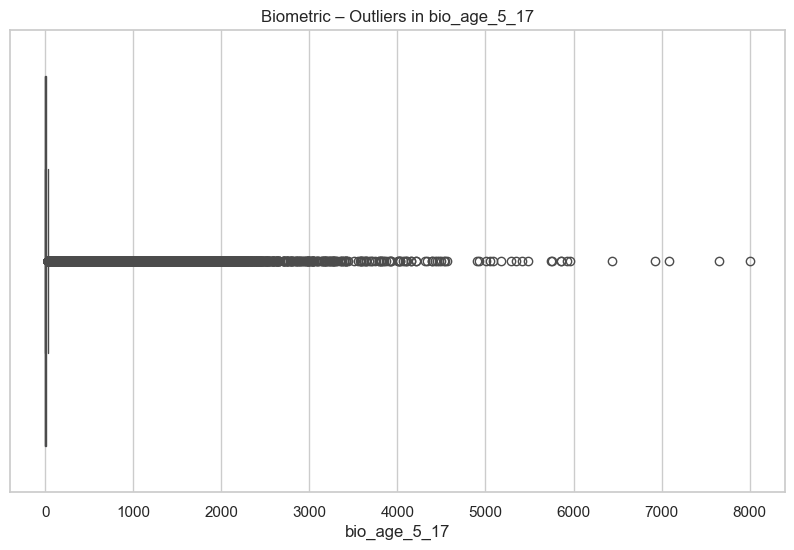

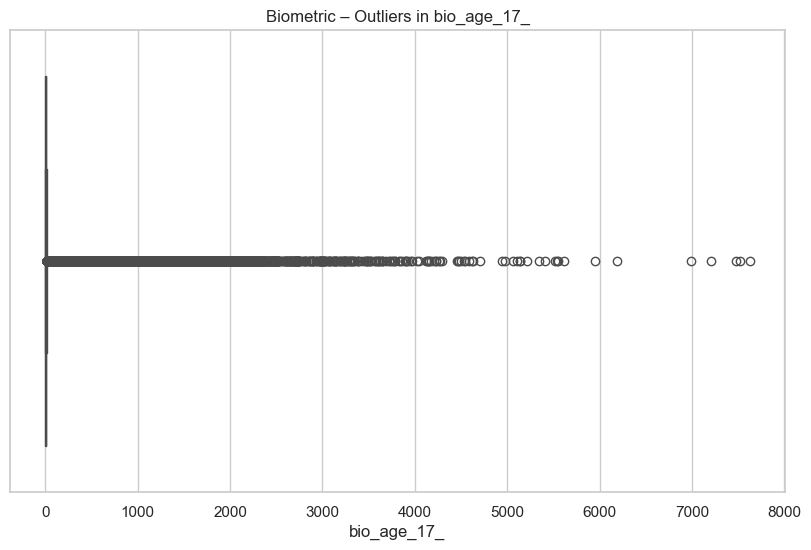

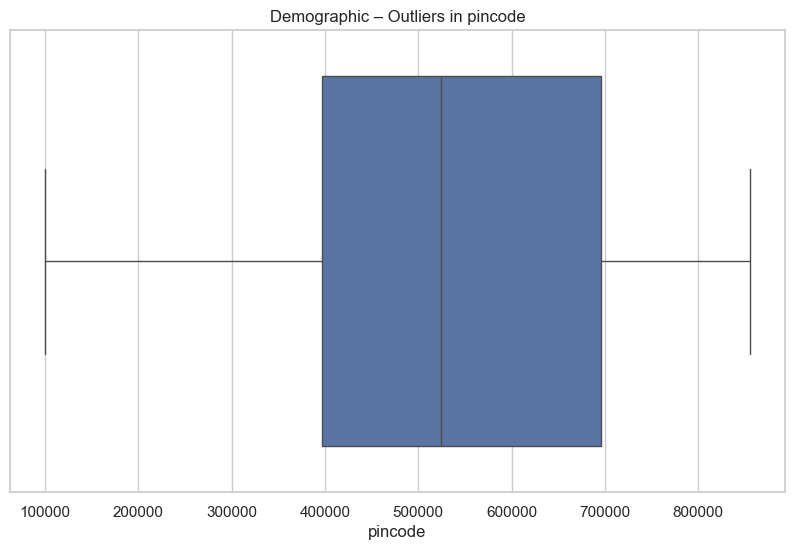

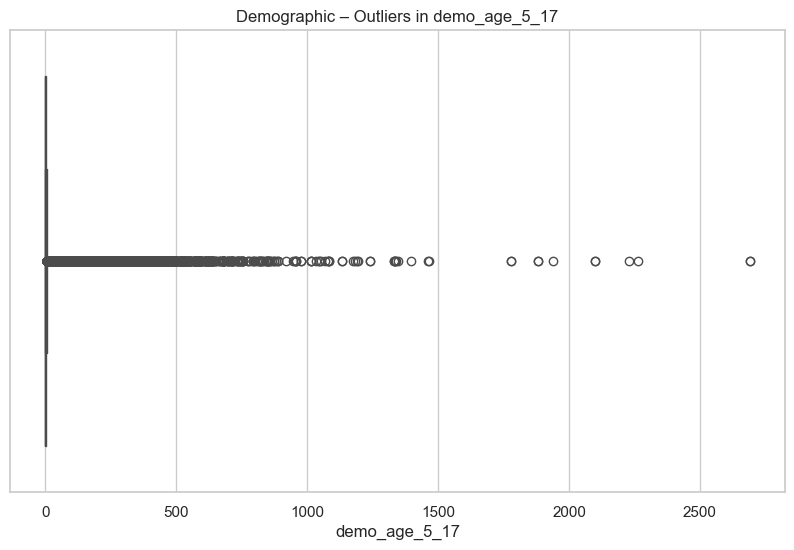

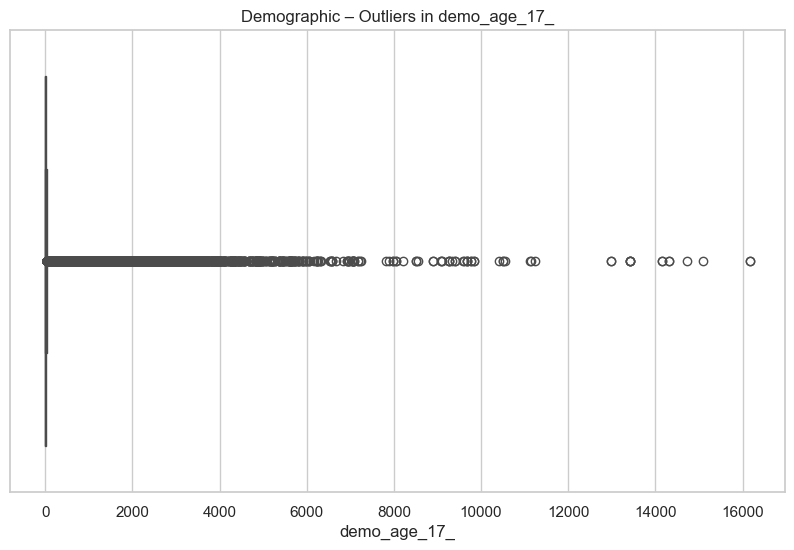

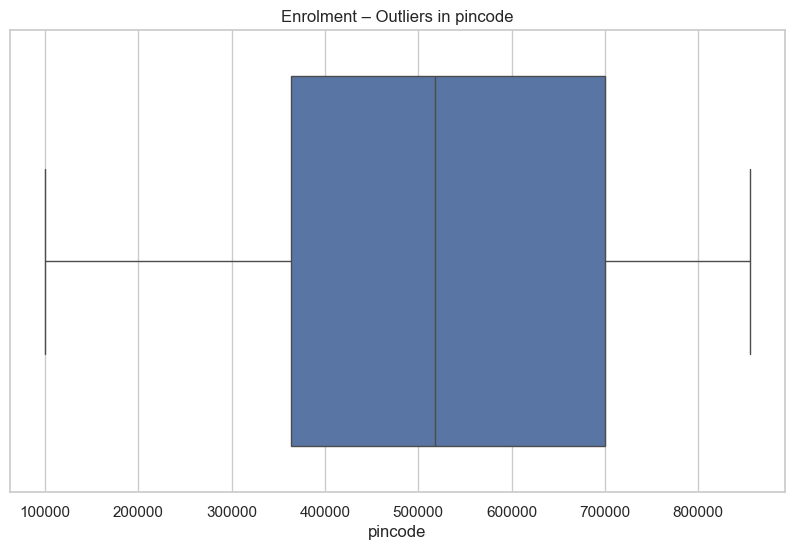

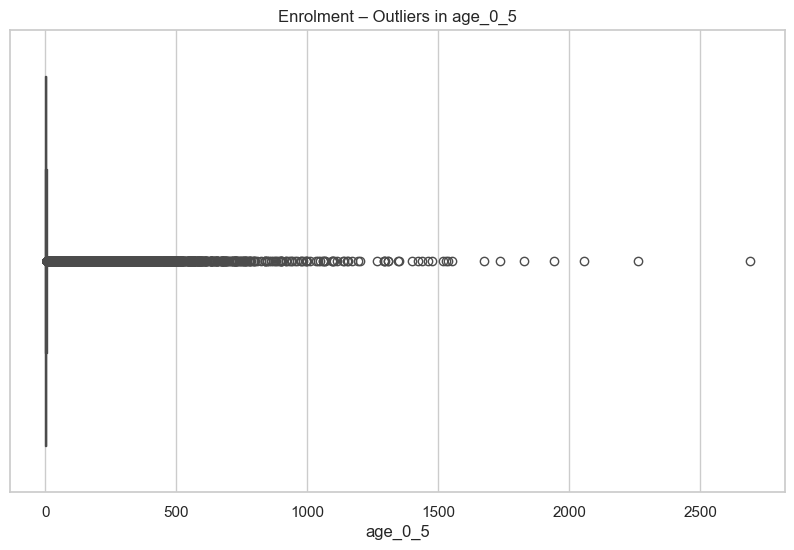

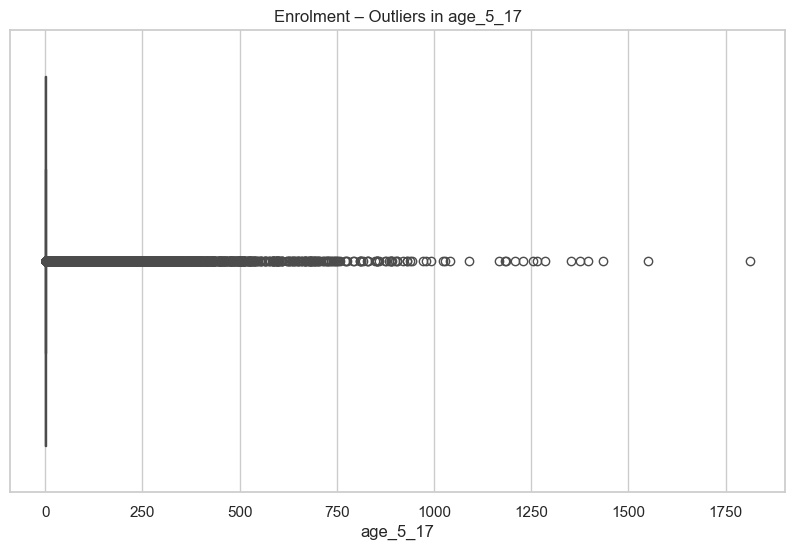

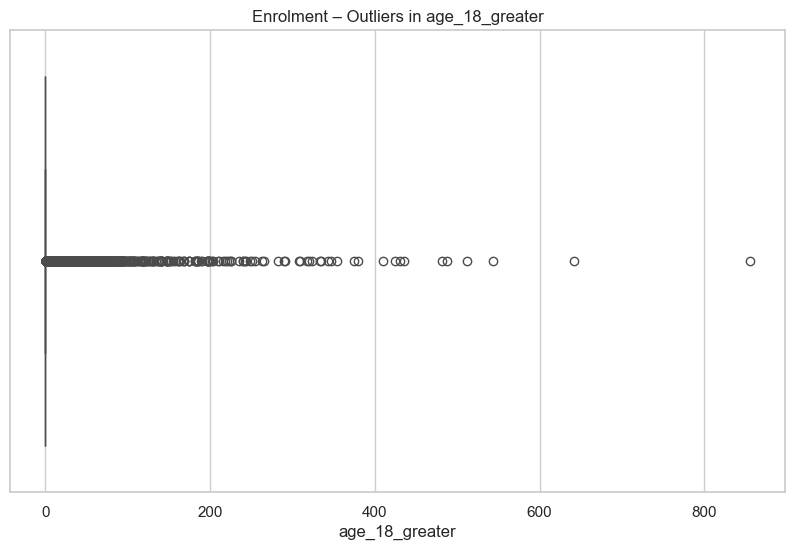

In [ ]:
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f"{name} – Outliers in {col}")
        plt.show()


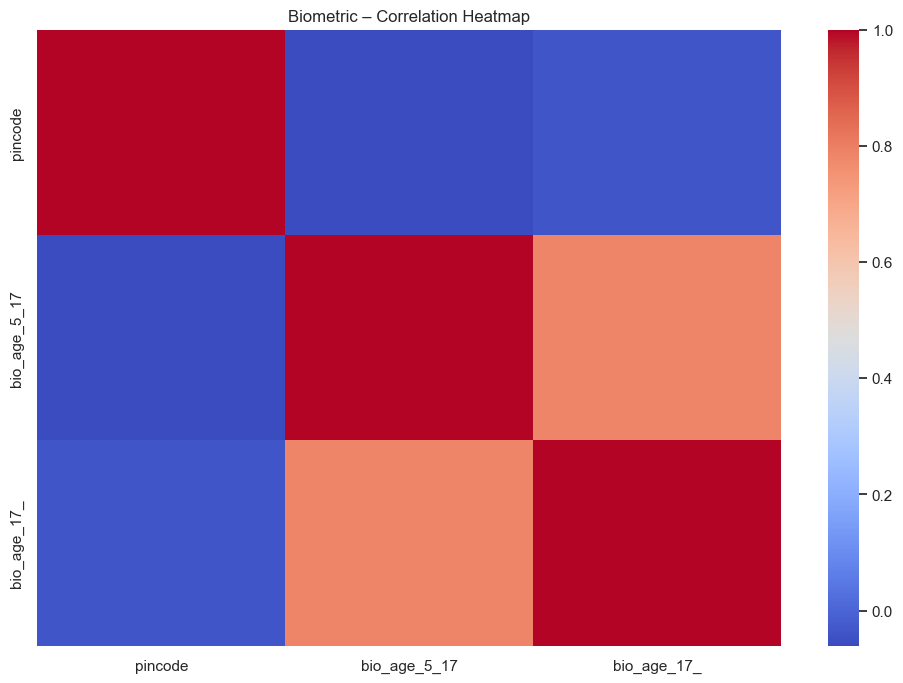

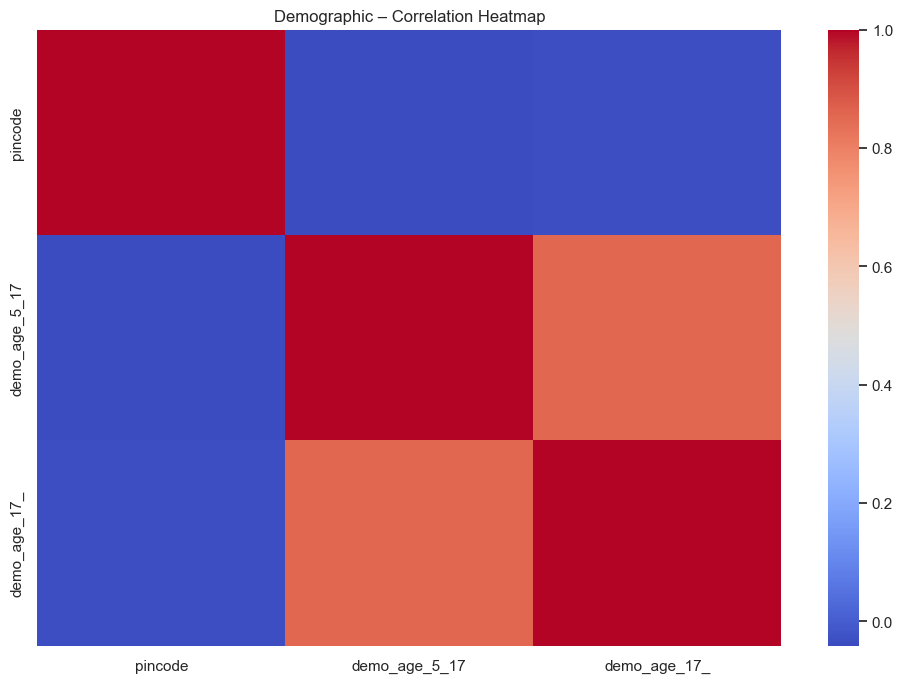

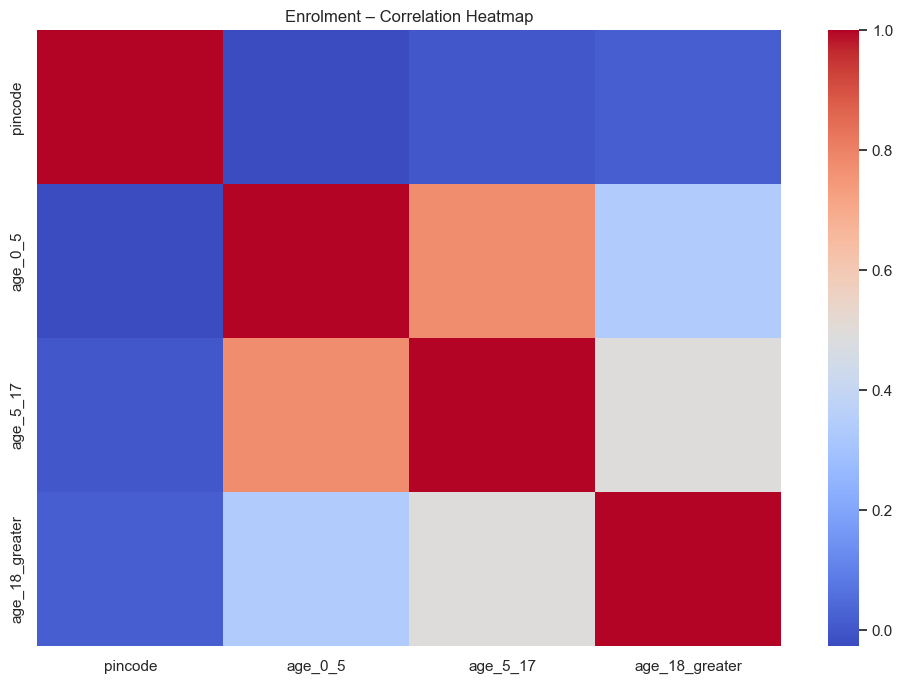

In [ ]:
for name, df in dataframes.items():
    numeric_df = df.select_dtypes(include=np.number)
    
    if numeric_df.shape[1] < 2:
        continue

    corr = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, cmap="coolwarm", annot=False)
    plt.title(f"{name} – Correlation Heatmap")
    plt.show()


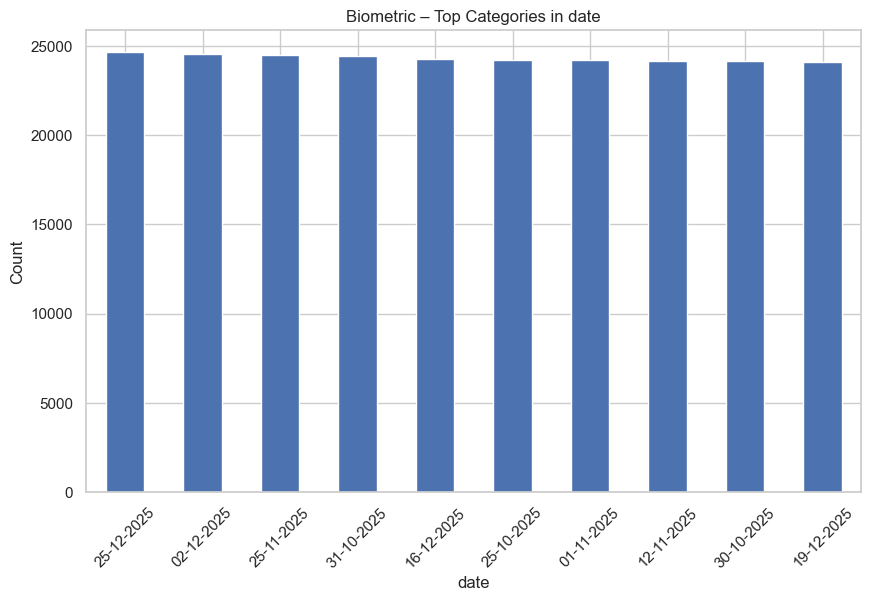

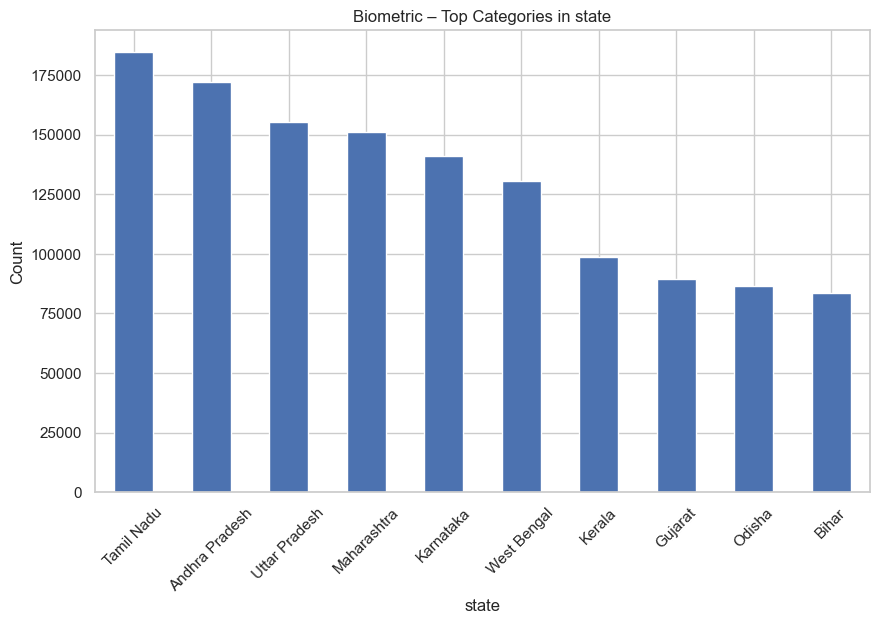

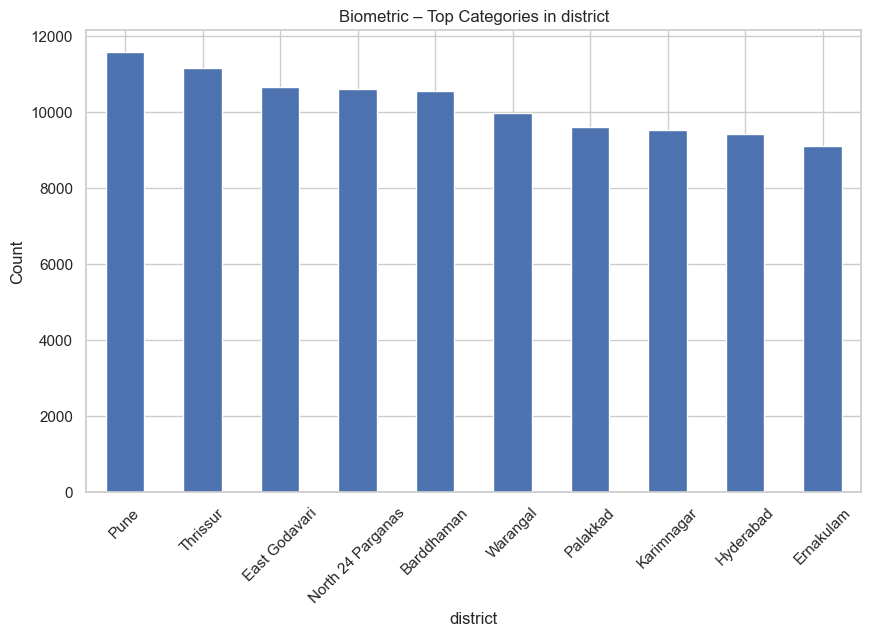

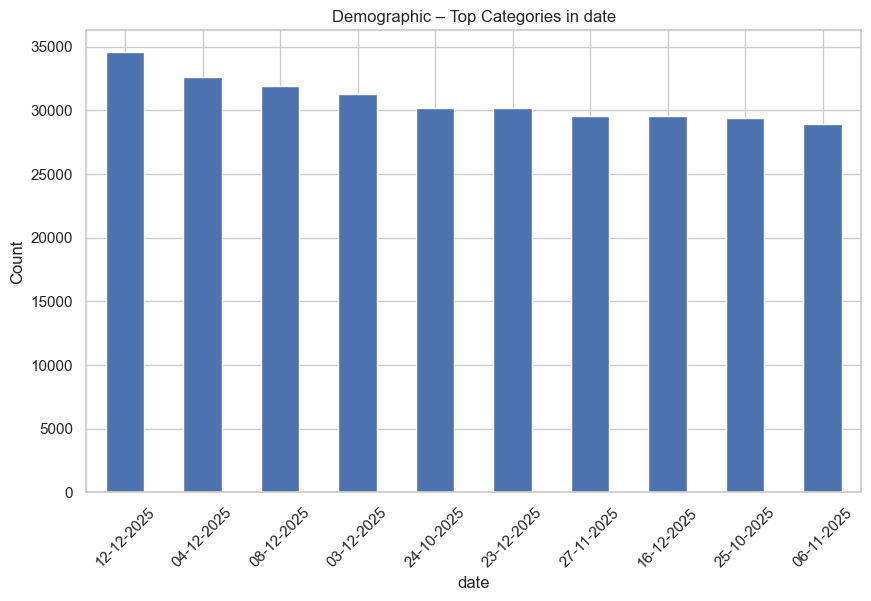

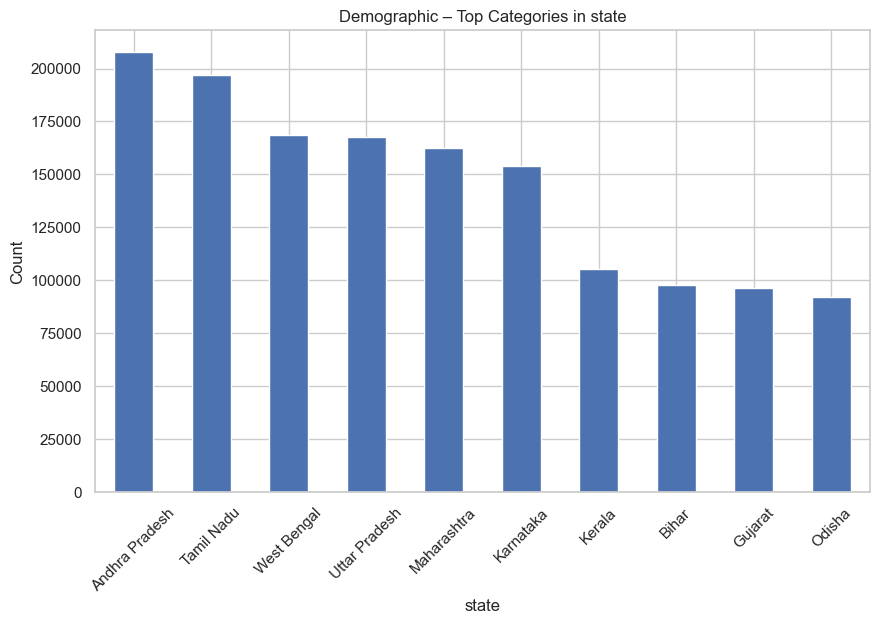

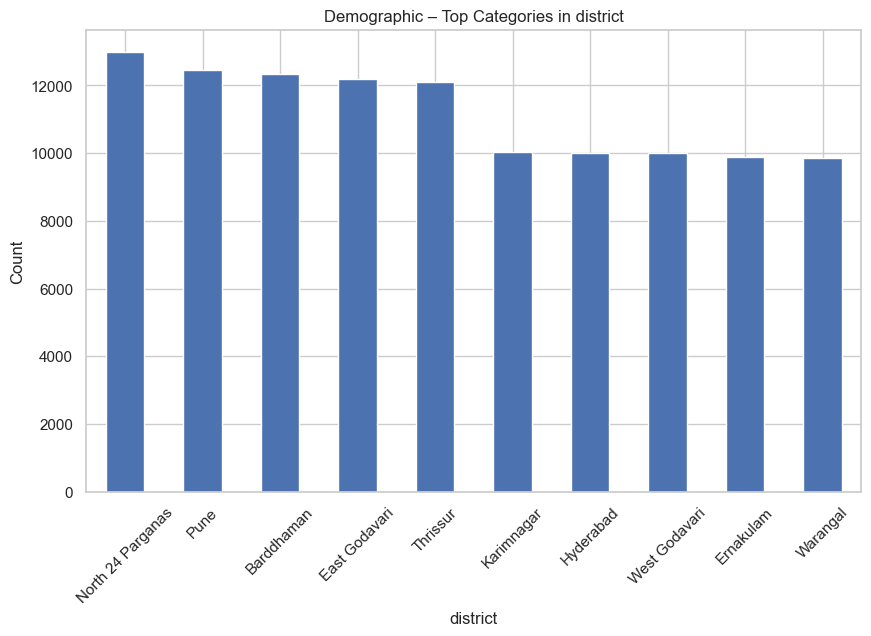

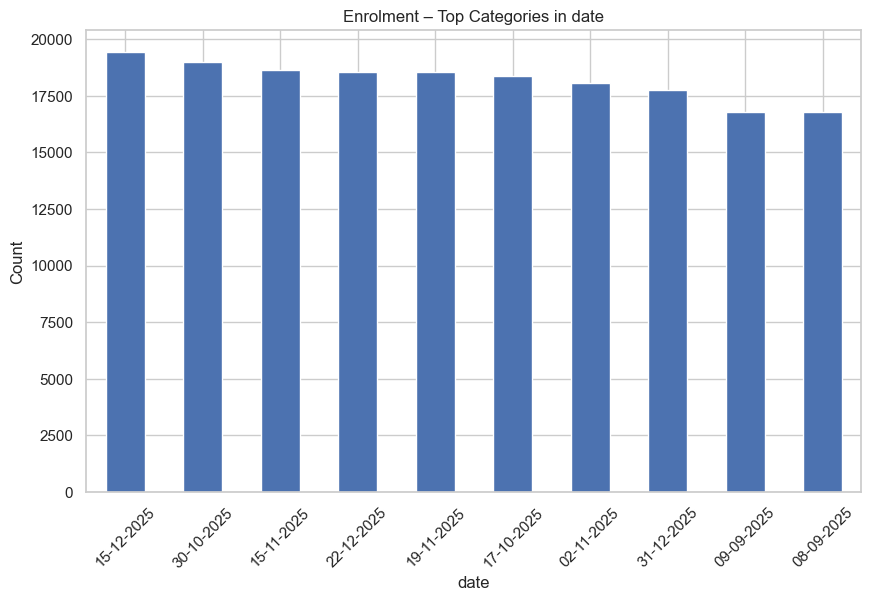

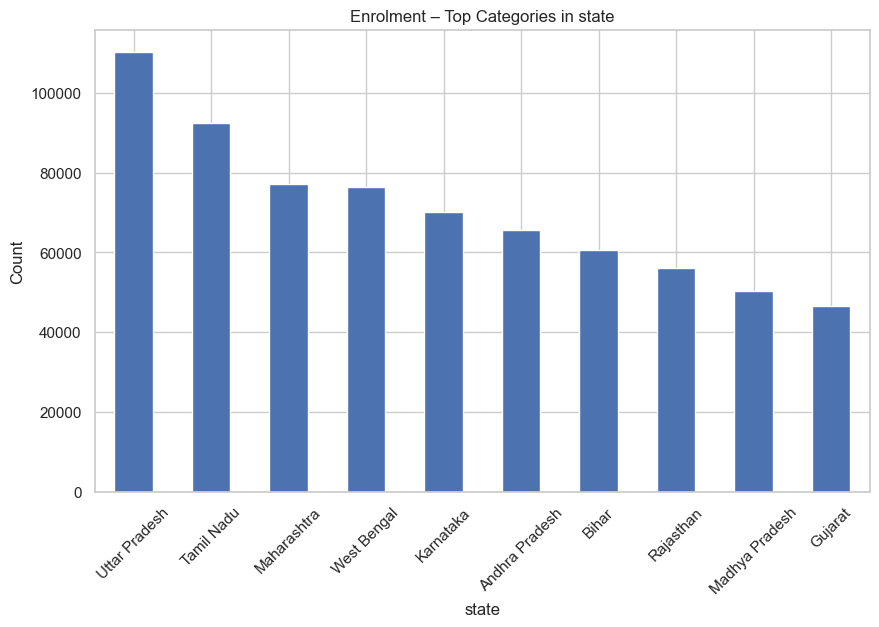

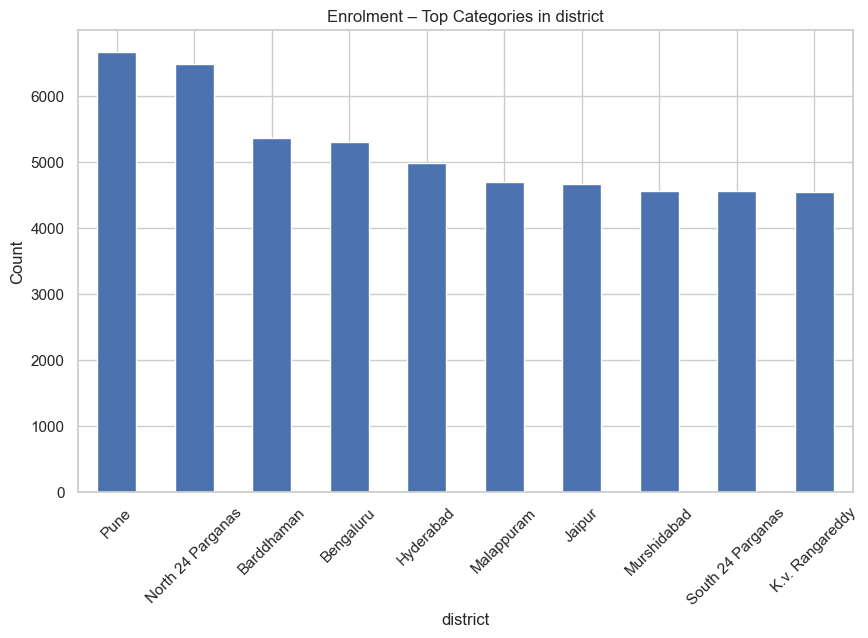

In [ ]:
for name, df in dataframes.items():
    cat_cols = df.select_dtypes(include="object").columns[:5]  # limit to avoid noise
    
    for col in cat_cols:
        plt.figure()
        df[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"{name} – Top Categories in {col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


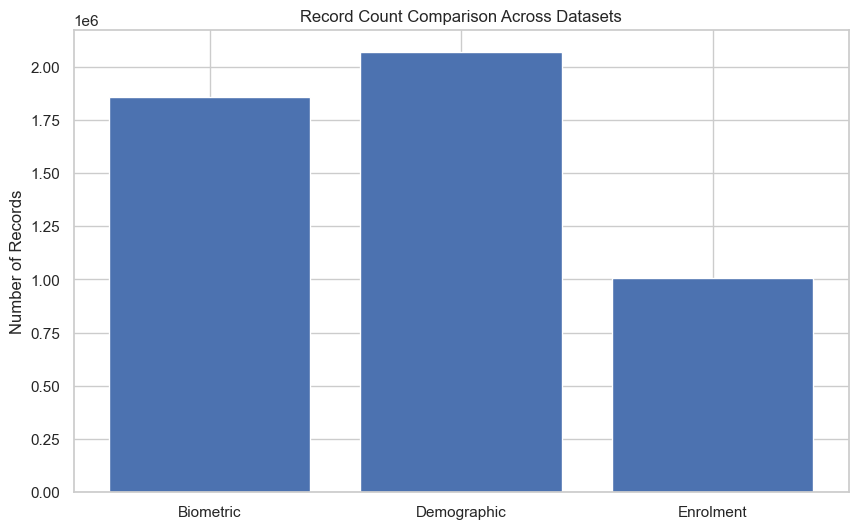

In [ ]:
sizes = {name: len(df) for name, df in dataframes.items()}

plt.figure()
plt.bar(sizes.keys(), sizes.values())
plt.title("Record Count Comparison Across Datasets")
plt.ylabel("Number of Records")
plt.show()


In [ ]:
def insight_summary(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "missing_%": (df.isnull().sum() / len(df)) * 100,
        "unique_values": df.nunique()
    }).sort_values("missing_%", ascending=False)

for name, df in dataframes.items():
    print(f"\n{name} – Insight Summary")
    display(insight_summary(df).head(10))



Biometric – Insight Summary


,dtype,missing_%,unique_values
date,object,0.0,89
state,object,0.0,57
district,object,0.0,974
pincode,int64,0.0,19707
bio_age_5_17,int64,0.0,2121
bio_age_17_,int64,0.0,2212



Demographic – Insight Summary


,dtype,missing_%,unique_values
date,object,0.0,95
state,object,0.0,65
district,object,0.0,983
pincode,int64,0.0,19742
demo_age_5_17,int64,0.0,614
demo_age_17_,int64,0.0,2668



Enrolment – Insight Summary


,dtype,missing_%,unique_values
date,object,0.0,92
state,object,0.0,55
district,object,0.0,985
pincode,int64,0.0,19463
age_0_5,int64,0.0,671
age_5_17,int64,0.0,624
age_18_greater,int64,0.0,199


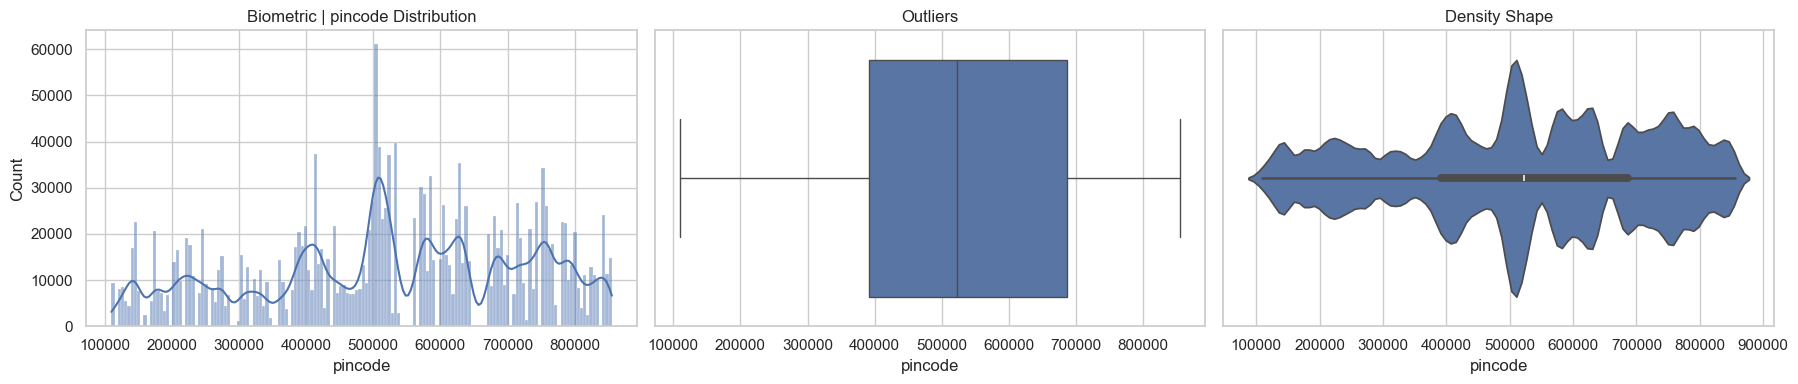

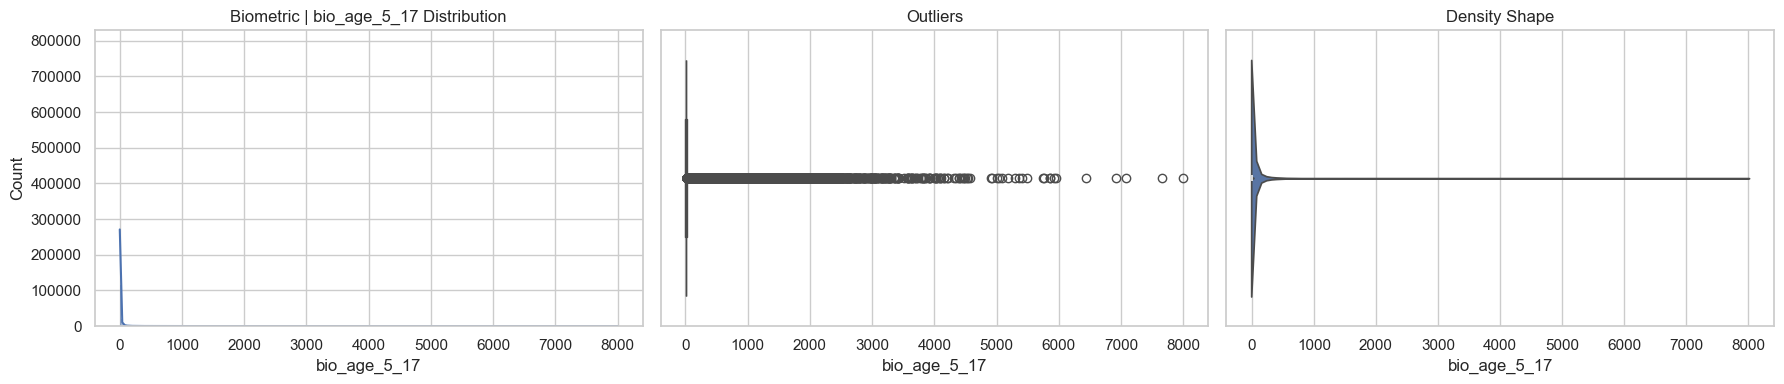

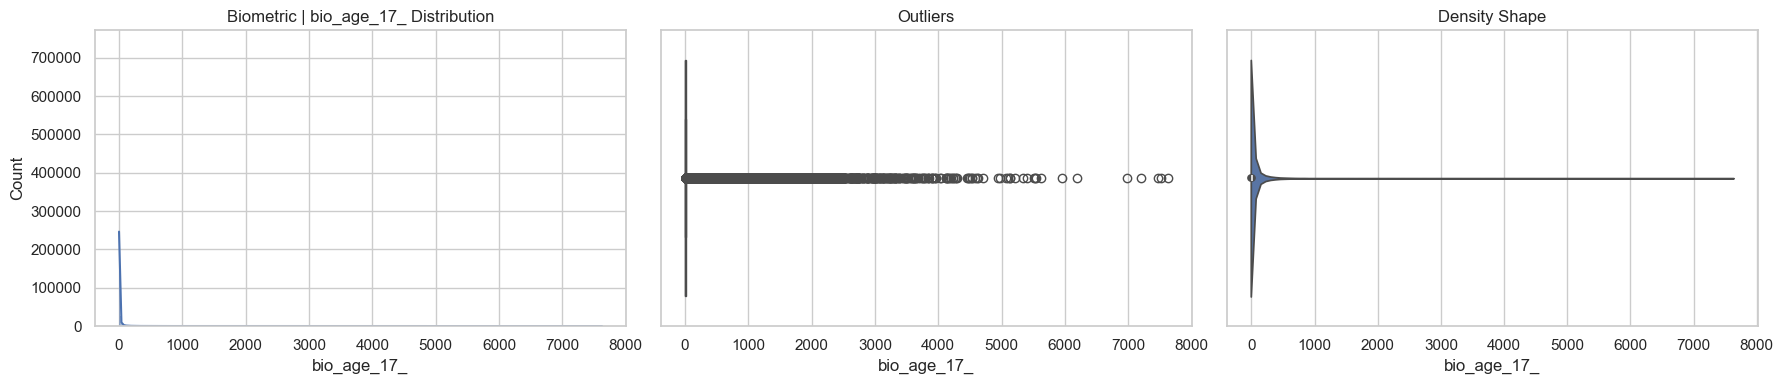

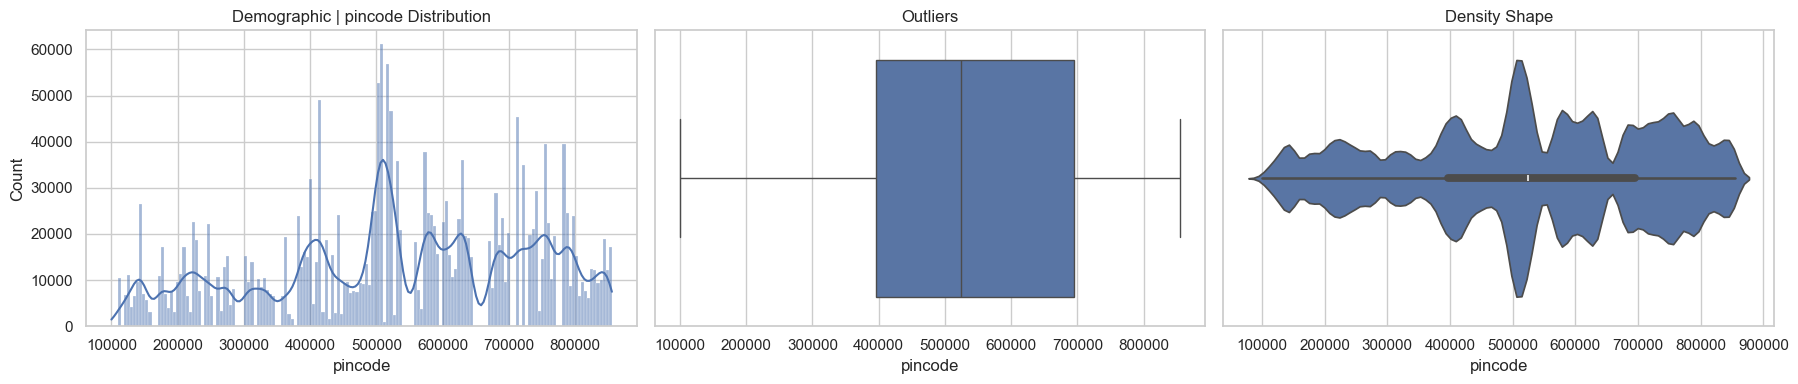

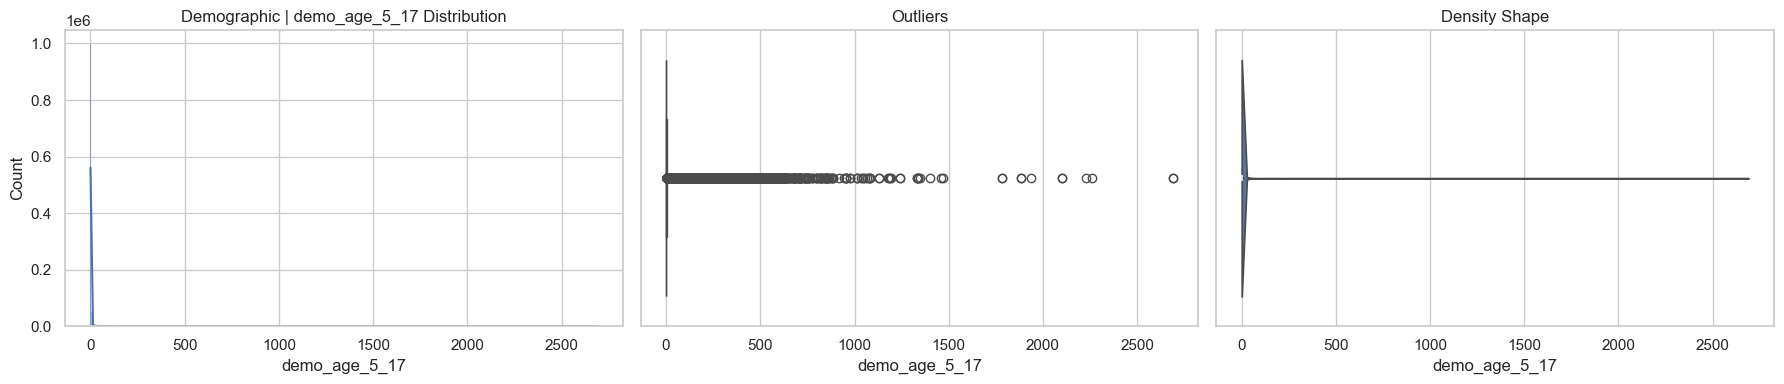

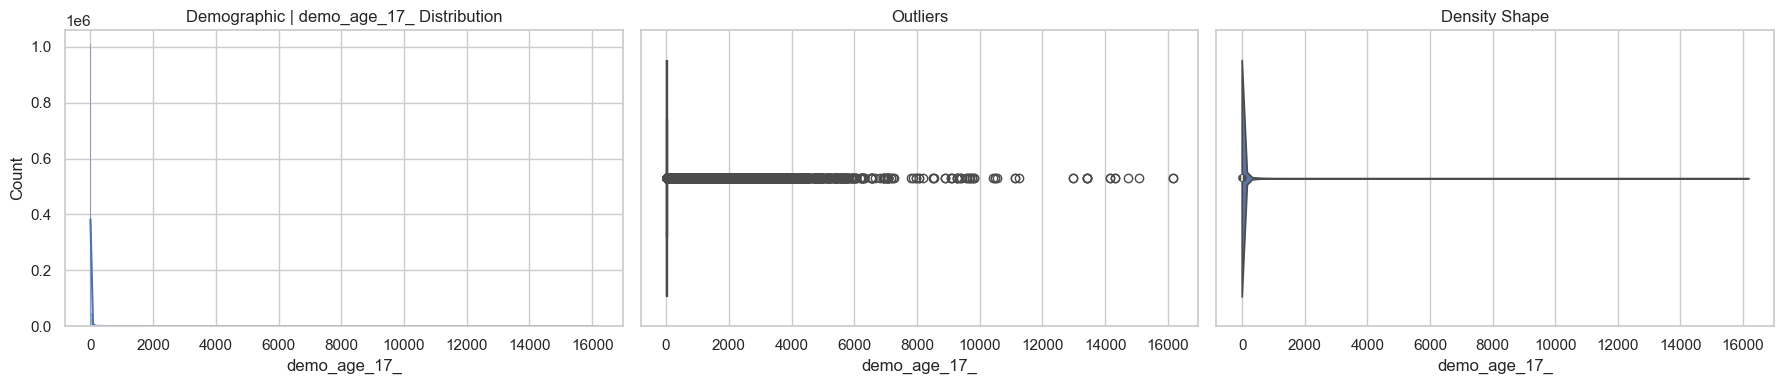

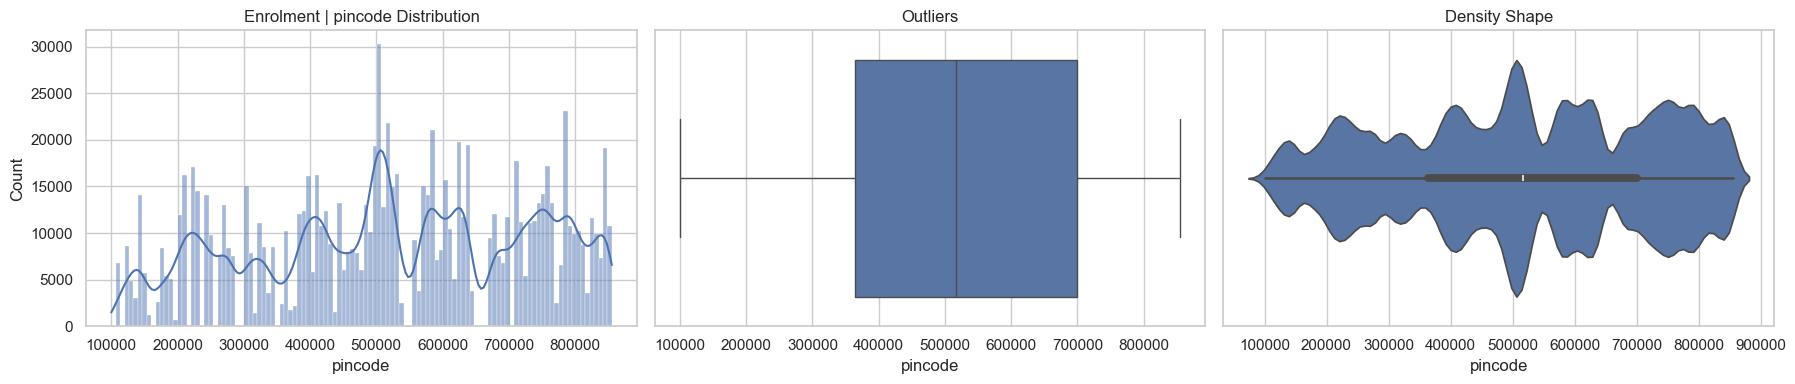

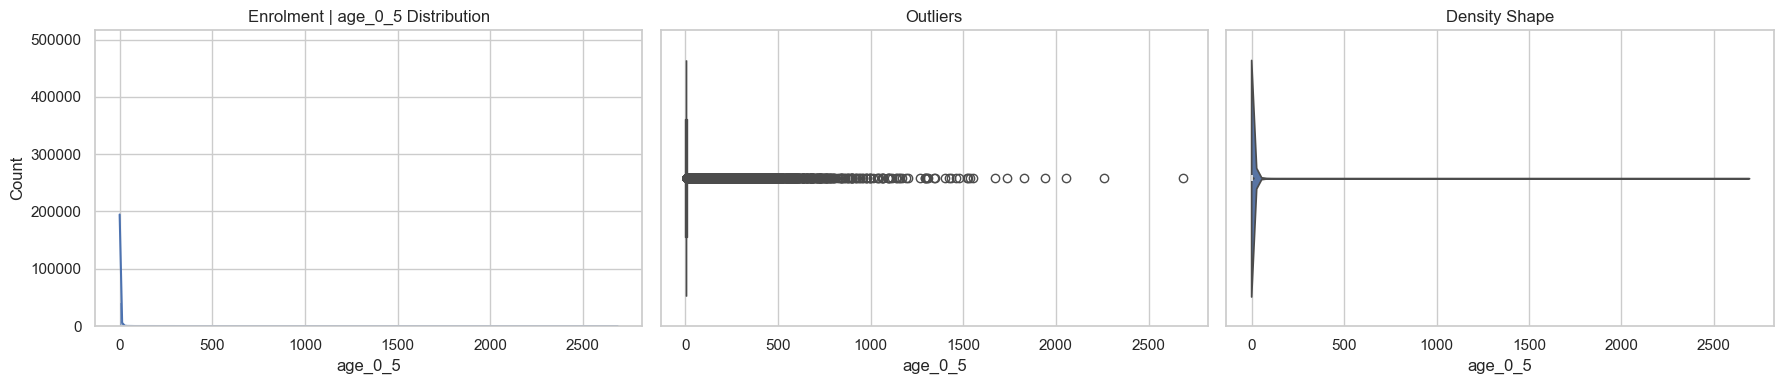

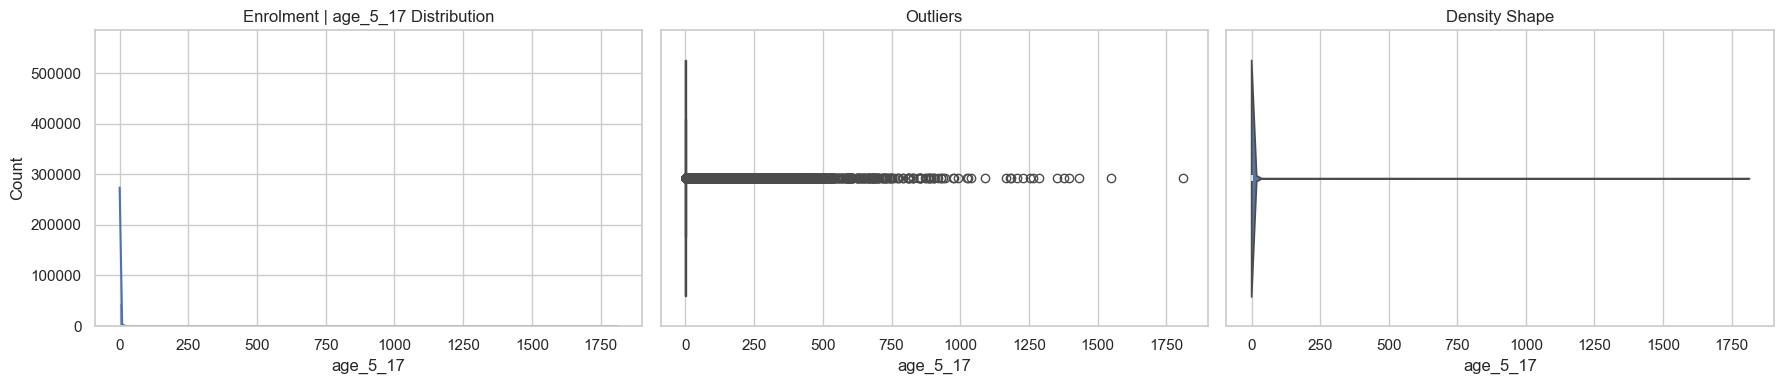

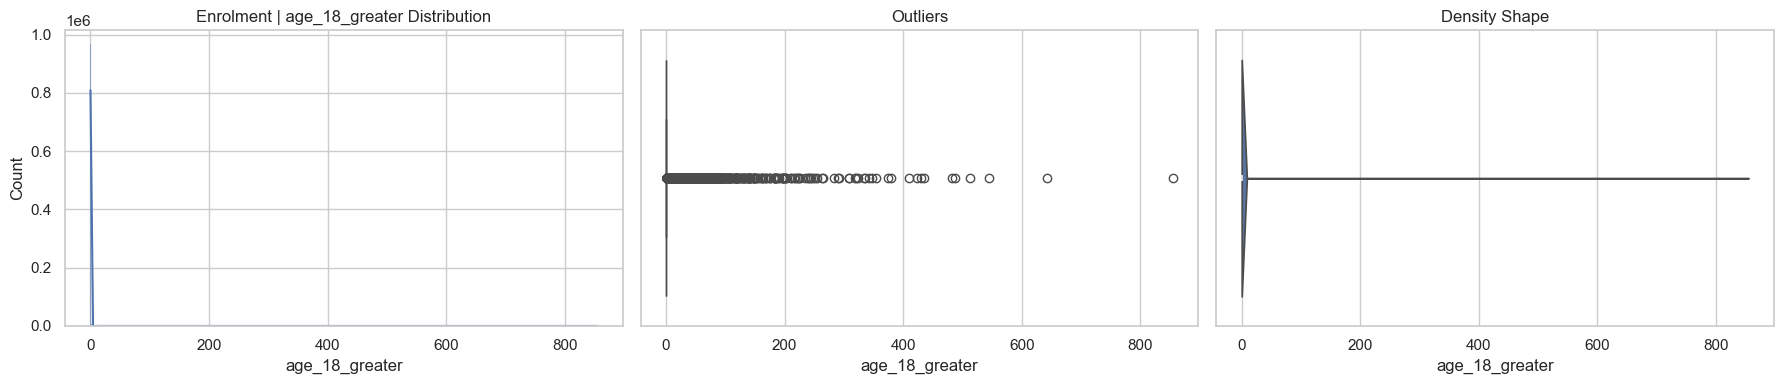

In [ ]:
def visualize_numeric(df, dataset_name):
    num_cols = df.select_dtypes(include=np.number).columns
    
    for col in num_cols:
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f"{dataset_name} | {col} Distribution")
        
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title("Outliers")
        
        sns.violinplot(x=df[col], ax=axes[2])
        axes[2].set_title("Density Shape")
        
        plt.tight_layout()
        plt.show()

for name, df in dataframes.items():
    visualize_numeric(df, name)


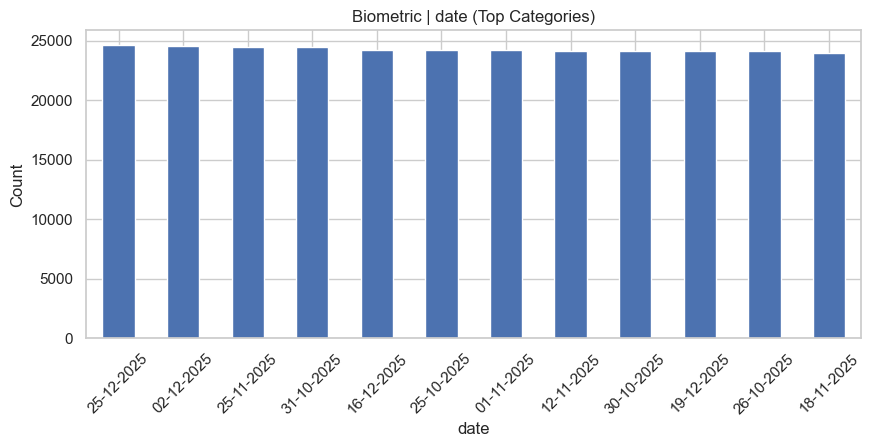

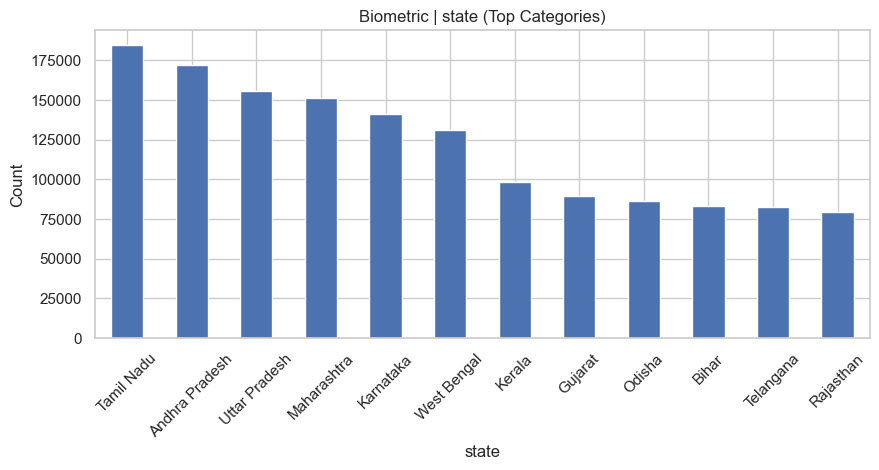

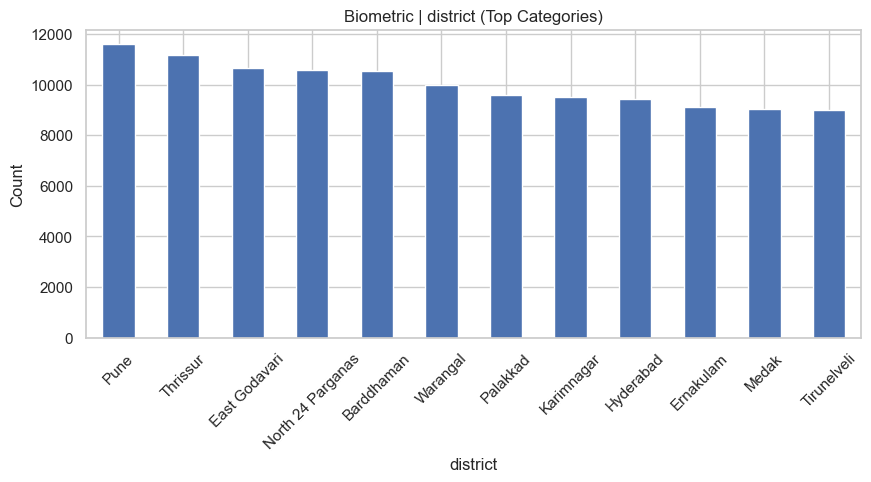

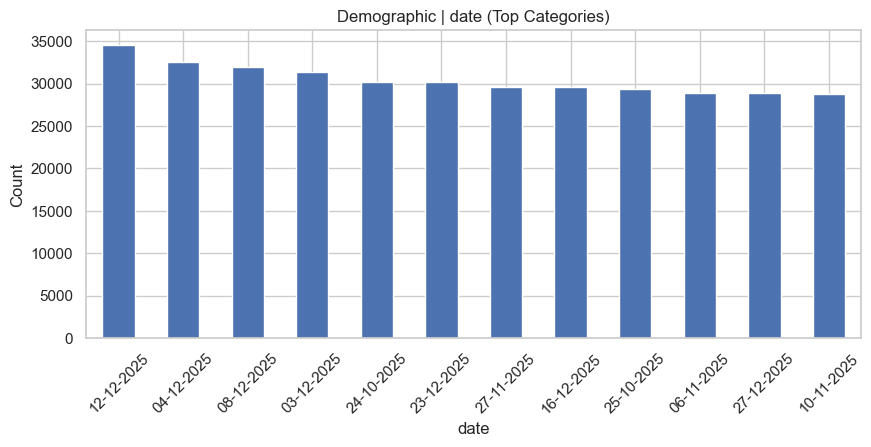

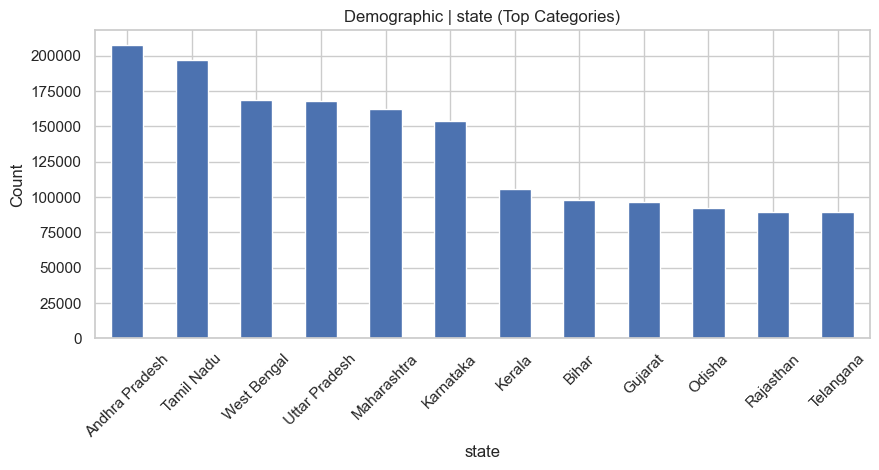

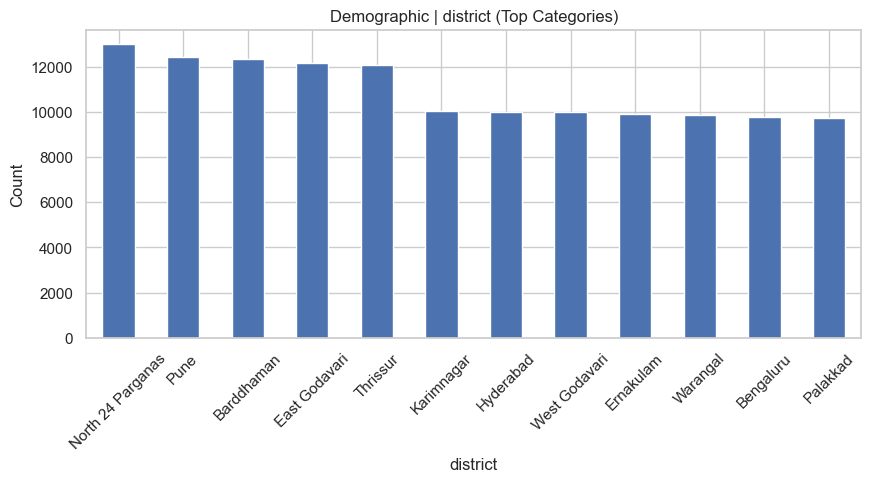

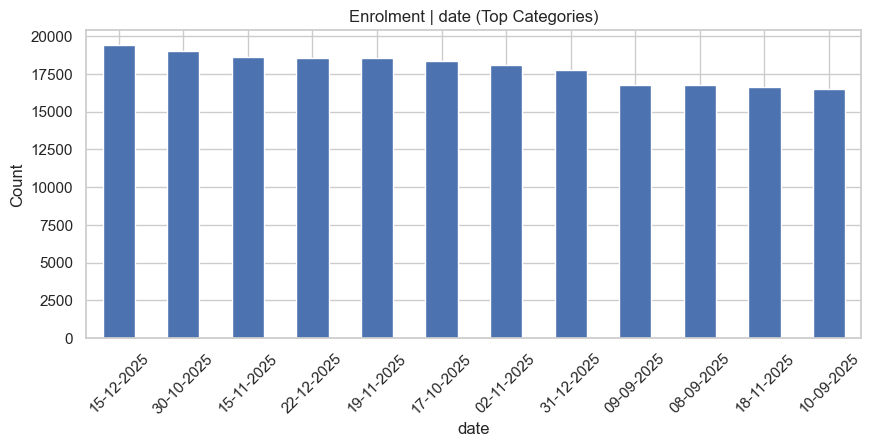

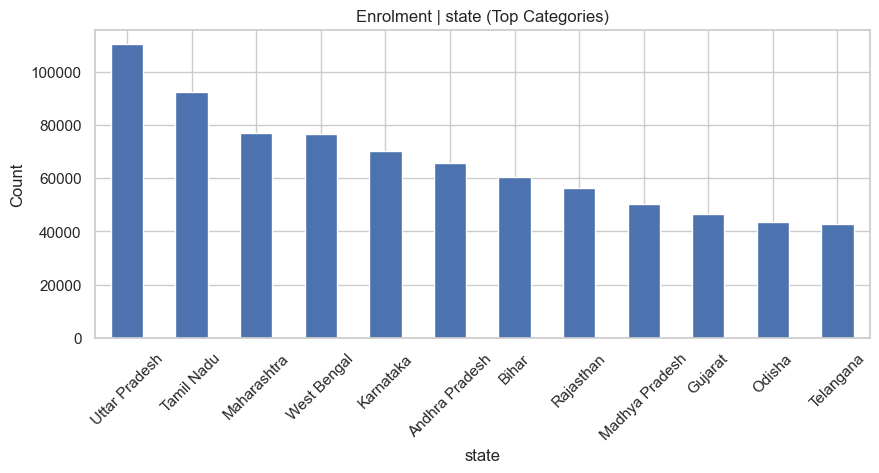

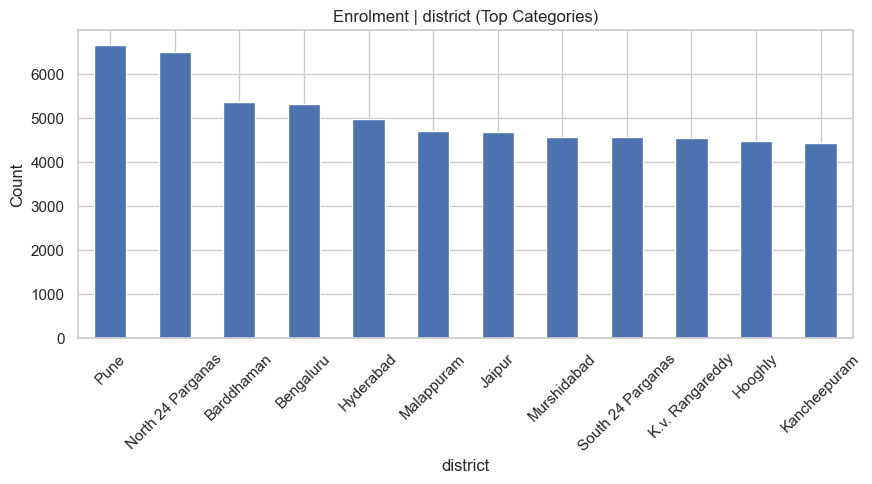

In [ ]:
def visualize_categorical(df, dataset_name, max_cols=6):
    cat_cols = df.select_dtypes(include="object").columns[:max_cols]
    
    for col in cat_cols:
        plt.figure(figsize=(10, 4))
        df[col].value_counts().head(12).plot(kind="bar")
        plt.title(f"{dataset_name} | {col} (Top Categories)")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

for name, df in dataframes.items():
    visualize_categorical(df, name)


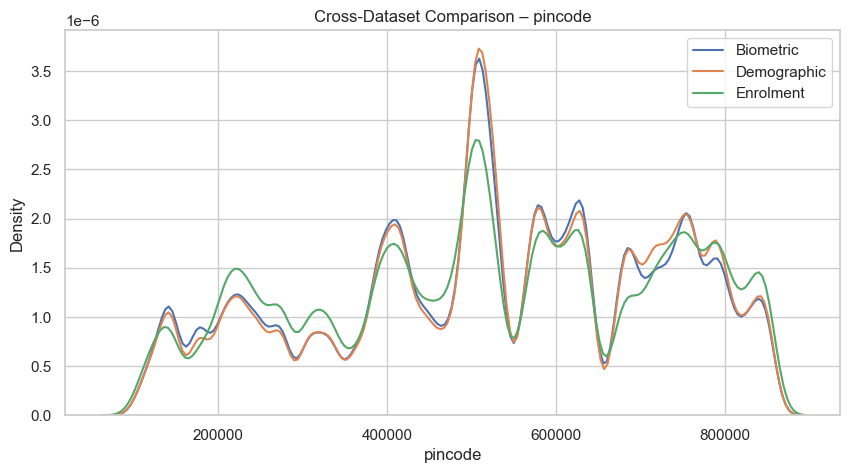

In [ ]:
common_numeric_cols = set(df_biometric.columns) \
    & set(df_demographic.columns) \
    & set(df_enrolment.columns)

common_numeric_cols = [
    col for col in common_numeric_cols
    if pd.api.types.is_numeric_dtype(df_biometric[col])
]

for col in common_numeric_cols:
    plt.figure(figsize=(10, 5))
    
    sns.kdeplot(df_biometric[col], label="Biometric")
    sns.kdeplot(df_demographic[col], label="Demographic")
    sns.kdeplot(df_enrolment[col], label="Enrolment")
    
    plt.title(f"Cross-Dataset Comparison – {col}")
    plt.legend()
    plt.show()
